In [1531]:
import warnings
warnings.filterwarnings('ignore')

In [1532]:
#let us start by importing the relevant libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1533]:
#Read CSV
cccd = pd.read_csv("CreditCardCustomerData.csv")
pd.set_option('use_inf_as_na', True)

In [1534]:
cccd.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [1535]:
cccd.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [1536]:
#It seeme SI_No and Customer Key is always going to be unique we can delete them

In [1537]:
cccd.corr()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,1.000000,0.052886,0.677962,0.739329,0.406438,0.033916,-0.684125
Customer Key,0.052886,1.000000,0.068604,-0.010281,-0.000560,0.022506,0.005968
Avg_Credit_Limit,0.677962,0.068604,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.739329,-0.010281,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,0.406438,-0.000560,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.033916,0.022506,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.684125,0.005968,-0.414352,-0.651251,-0.506016,0.127299,1.000000


In [1538]:
cccd.shape

(660, 7)

In [1539]:
cccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [1540]:
#Check for missing value 
cccd.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [1541]:
#No Null values found

In [1542]:
#From the cccd.describe we can see that there are no negative values in the system so we should not make any change. 

In [1543]:
cccd.duplicated(subset=['Sl_No','Customer Key']).sum()

0

In [1544]:
#From above we can safely say the values are not duplicated and are unique we can safely delete those columns. 

In [1545]:
cccd.drop(['Sl_No','Customer Key'], axis=1,inplace=True)

In [1546]:
#Look at the pairplot 


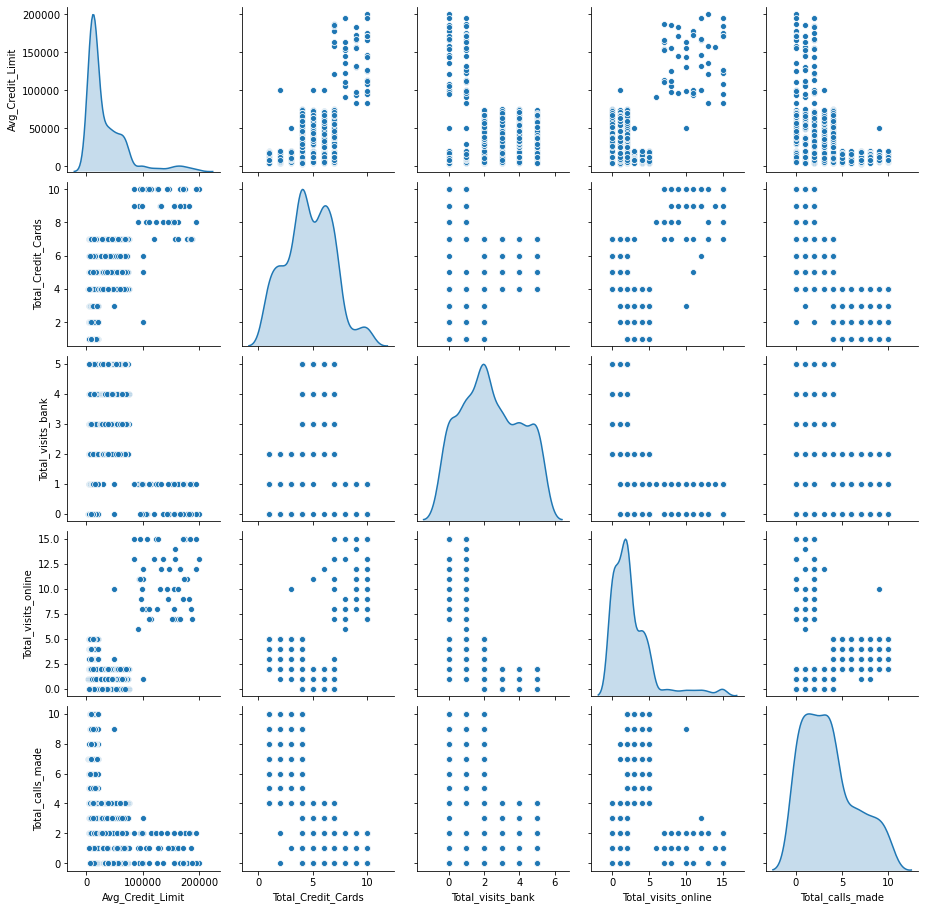

In [1547]:
sns.pairplot(cccd,diag_kind='kde')

In [1548]:
#From above we can infer 
#1. There is inverse relationship between Total Call Made to Average Credit Limit
#2. There is inverse relationship between Total calls made to Total credit cards 
#3. There is positive relationship between Average Credit Limit to Total credit cards 

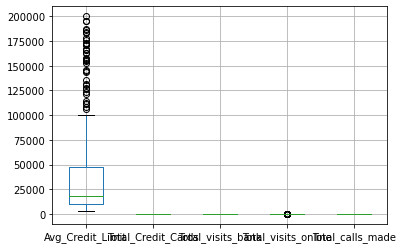

In [1549]:
cccd.boxplot()

In [1550]:
#We could see outliers for average credit limit and Total Visits Online

{'whiskers': [<matplotlib.lines.Line2D at 0x7faa27022580>,
 'caps': [<matplotlib.lines.Line2D at 0x7faa27022c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faa27022220>],
 'medians': [<matplotlib.lines.Line2D at 0x7faa2702b280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faa2702b550>],
 'means': []}

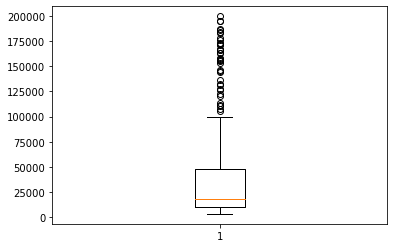

In [1551]:
plt.boxplot(cccd['Avg_Credit_Limit'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7faa270adf10>,
 'caps': [<matplotlib.lines.Line2D at 0x7faa270b9610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faa270adbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7faa270b9cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faa270b9fd0>],
 'means': []}

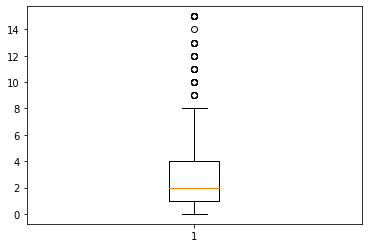

In [1552]:
plt.boxplot(cccd['Total_visits_online'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7faa28d47550>,
 'caps': [<matplotlib.lines.Line2D at 0x7faa28d47c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faa28d471f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7faa28d50310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faa28d50610>],
 'means': []}

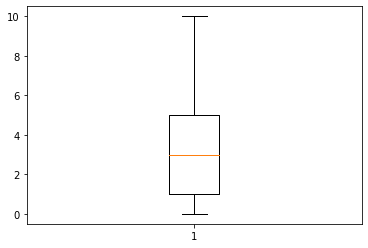

In [1553]:
plt.boxplot(cccd['Total_calls_made'])

In [1554]:
cccd_new = cccd

In [1555]:
#Lets try to remove outliers from Average Credit Limit and also from 
cccd_new['Avg_Credit_Limit'] = np.log(cccd_new['Avg_Credit_Limit'])
cccd_new['Total_visits_online'] = np.log(cccd_new['Total_visits_online'])

In [1556]:
cccd_new['Total_visits_online'].values

array([0.        , 2.30258509, 1.09861229, 0.        , 2.48490665,
       0.        , 2.39789527, 0.        , 0.69314718, 0.        ,
       1.60943791, 0.69314718, 1.60943791, 1.60943791, 1.38629436,
       1.60943791, 0.69314718, 1.09861229, 0.69314718, 1.60943791,
       1.60943791, 1.09861229, 1.38629436, 1.09861229, 0.69314718,
       1.60943791, 1.60943791, 0.69314718, 1.38629436, 1.38629436,
       1.60943791, 1.60943791, 1.60943791, 1.60943791, 1.09861229,
       1.38629436, 1.38629436, 1.38629436, 1.09861229, 1.38629436,
       1.60943791, 0.69314718, 1.09861229, 1.38629436, 1.38629436,
       1.38629436, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       1.60943791, 1.60943791, 1.60943791, 1.60943791, 1.38629436,
       0.69314718, 0.69314718, 0.69314718, 1.38629436, 1.38629436,
       1.38629436, 0.69314718, 0.69314718, 1.38629436, 1.60943791,
       1.38629436, 1.09861229, 0.69314718, 1.38629436, 1.09861229,
       1.38629436, 0.69314718, 0.69314718, 1.09861229, 1.60943

In [1557]:
cccd_kmeans = cccd_new.replace([np.inf, -np.inf], 0.00000000)
cccd_agg = cccd_kmeans

In [1558]:
cccd_kmeans['Total_visits_online'].values

array([0.        , 2.30258509, 1.09861229, 0.        , 2.48490665,
       0.        , 2.39789527, 0.        , 0.69314718, 0.        ,
       1.60943791, 0.69314718, 1.60943791, 1.60943791, 1.38629436,
       1.60943791, 0.69314718, 1.09861229, 0.69314718, 1.60943791,
       1.60943791, 1.09861229, 1.38629436, 1.09861229, 0.69314718,
       1.60943791, 1.60943791, 0.69314718, 1.38629436, 1.38629436,
       1.60943791, 1.60943791, 1.60943791, 1.60943791, 1.09861229,
       1.38629436, 1.38629436, 1.38629436, 1.09861229, 1.38629436,
       1.60943791, 0.69314718, 1.09861229, 1.38629436, 1.38629436,
       1.38629436, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       1.60943791, 1.60943791, 1.60943791, 1.60943791, 1.38629436,
       0.69314718, 0.69314718, 0.69314718, 1.38629436, 1.38629436,
       1.38629436, 0.69314718, 0.69314718, 1.38629436, 1.60943791,
       1.38629436, 1.09861229, 0.69314718, 1.38629436, 1.09861229,
       1.38629436, 0.69314718, 0.69314718, 1.09861229, 1.60943

In [1559]:
cccd_kmeans.isna().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [1560]:
cccd_kmeans.info

<bound method DataFrame.info of      Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.000000                 0  
1               2.302585                 9  
2               1.098612                 4  
3               0.0

In [1561]:
cccd_kmeans.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,9.996115,4.706061,2.403030,0.730068,3.583333
std,0.930992,2.167835,1.631813,0.729176,2.865317
min,8.006368,1.000000,0.000000,0.000000,0.000000
25%,9.210340,3.000000,1.000000,0.000000,1.000000
50%,9.798127,5.000000,2.000000,0.693147,3.000000
75%,10.778956,6.000000,4.000000,1.386294,5.000000
max,12.206073,10.000000,5.000000,2.708050,10.000000


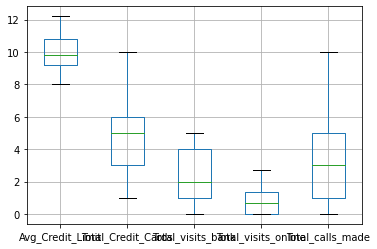

In [1562]:
cccd_kmeans.boxplot()

In [1563]:
#This looks much better for our future work 

In [1564]:
cccd_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Avg_Credit_Limit     660 non-null    float64
 1   Total_Credit_Cards   660 non-null    int64  
 2   Total_visits_bank    660 non-null    int64  
 3   Total_visits_online  660 non-null    float64
 4   Total_calls_made     660 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 25.9 KB


In [1565]:
cccd_kmeans.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,9.996115,4.706061,2.403030,0.730068,3.583333
std,0.930992,2.167835,1.631813,0.729176,2.865317
min,8.006368,1.000000,0.000000,0.000000,0.000000
25%,9.210340,3.000000,1.000000,0.000000,1.000000
50%,9.798127,5.000000,2.000000,0.693147,3.000000
75%,10.778956,6.000000,4.000000,1.386294,5.000000
max,12.206073,10.000000,5.000000,2.708050,10.000000


In [1566]:
#Lets look at scaling now since AVG_CREDIT_LIMIT will have a much bigger say 

In [1567]:
from scipy.stats import zscore

cccd_new.dtypes
numeric_cols = cccd_kmeans.select_dtypes(include=[np.float64,np.int64]).columns
numeric_cols
cccd_kmeans[numeric_cols] =cccd_kmeans[numeric_cols].apply(zscore)


In [1568]:
cccd_kmeans.head(50)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.630478,-1.249225,-0.860451,-1.001984,-1.251537
1,0.885387,-0.787585,-1.473731,2.158203,1.891859
2,0.885387,1.058973,-0.860451,0.505809,0.145528
3,0.336281,0.135694,-0.860451,-1.001984,0.145528
4,1.630478,0.597334,-1.473731,2.408431,-0.203739
5,-0.099569,-0.787585,-1.473731,-1.001984,1.542593
6,1.630478,0.135694,-1.473731,2.289012,-0.553005
7,-0.408809,-0.787585,-1.473731,-1.001984,-0.902271
8,-1.589750,-1.249225,-1.473731,-0.050673,-0.553005
9,-2.138856,-0.325946,-1.473731,-1.001984,1.193326


In [1569]:
cccd_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Avg_Credit_Limit     660 non-null    float64
 1   Total_Credit_Cards   660 non-null    float64
 2   Total_visits_bank    660 non-null    float64
 3   Total_visits_online  660 non-null    float64
 4   Total_calls_made     660 non-null    float64
dtypes: float64(5)
memory usage: 25.9 KB


In [1570]:
cccd_kmeans.shape

(660, 5)

In [1571]:
cccd_kmeans.isna().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [1572]:
#Lets create appropriate clusters with the updated dataset
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [1573]:
cluster_range = range(1,30)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=5)
    clusters.fit(cccd_kmeans)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:30]

,num_clusters,cluster_errors
0,1,3300.000000
1,2,1872.566365
2,3,1117.394240
3,4,887.700142
4,5,801.969686
5,6,725.552141
6,7,696.650957
7,8,632.564526
8,9,605.228688
9,10,578.367915


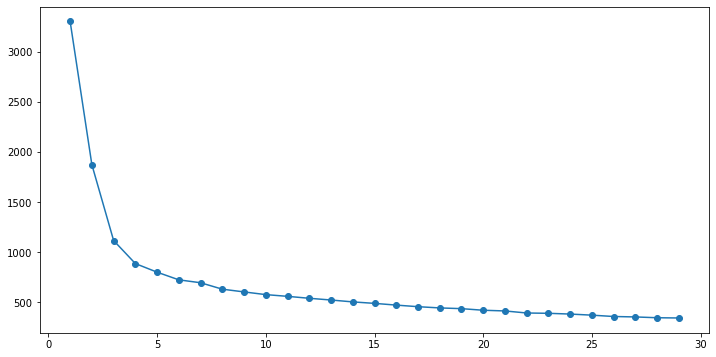

In [1574]:
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )


In [1324]:
#We can see when the number of clusters are 4,5,6,7 we can see a good curve 
#after that we dont see a much difference in error
#I will use 5

In [1575]:
kmeans = KMeans(n_clusters=5, n_init =5, random_state=12345)
kmeans.fit(cccd_kmeans)


KMeans(n_clusters=5, n_init=5, random_state=12345)

In [1576]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 50 133 222 104 151]


In [1577]:


# Find the centroid in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(cccd_kmeans) )
centroid_df.transpose()

,0,1,2,3,4
Avg_Credit_Limit,1.966490,0.755767,-0.727964,0.767712,-0.775336
Total_Credit_Cards,1.862226,0.354365,-1.064153,0.410902,0.352756
Total_visits_bank,-1.105763,0.015664,-0.901888,1.286030,0.792563
Total_visits_online,2.226979,-0.675927,0.660066,-0.672684,-0.649179
Total_calls_made,-0.874330,-0.518866,1.161861,-0.569797,-0.569196


In [1578]:
#Group 4 has the highest value for AVG_CREDIT_LIMIT and goup 0 has the lowest value
#Group 4 has the highest value for Total_Credit_Cards and Group 3 has the lowest value
#Group 2 has the highest value for the Total_visits_bank and group 4 has the lowest value
#Group 4 has the highest value for Total_visits_online and group 1 has the lowest value 
#Group 3 has the highest value for the total calls made and group 2 has the lowest value 

In [1579]:
# Add cluster number to original cccd_kmeans data

predictions = kmeans.predict(cccd_kmeans)
predictions
cccd["group"] = predictions
cccd['group'] = cccd['group'].astype('category')
cccd.dtypes


Avg_Credit_Limit        float64
Total_Credit_Cards        int64
Total_visits_bank         int64
Total_visits_online     float64
Total_calls_made          int64
group                  category
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa2a450a30>,
      dtype=object)

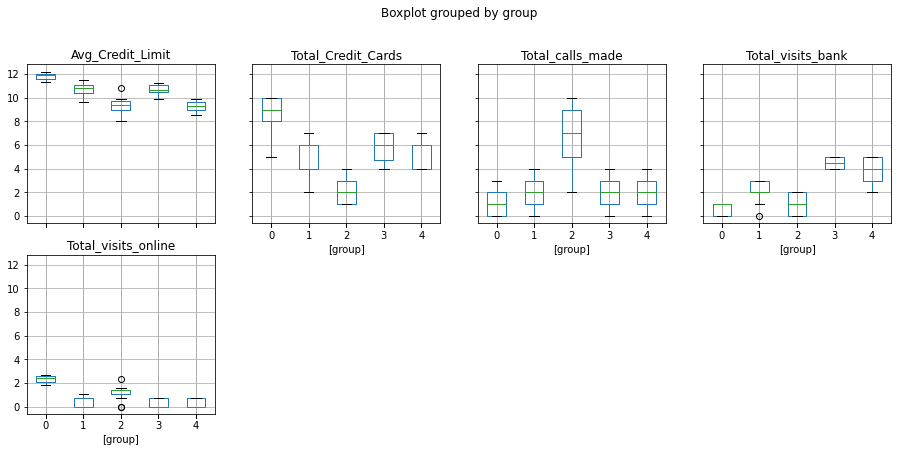

In [1580]:
cccd_updated["group"] = predictions
cccd_updated.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

In [1581]:
#Group 4 ischaracterized by higher average credit limit, total credit cards and total visits online with lower total
#total calls made and lower total visits bank 

#Group 3 is chracterized by highest total calls made 
#Group 0 is mostly characterized by higher total calls made but very few visits to the bank 

In [1582]:
from sklearn.cluster import AgglomerativeClustering 

In [1583]:
from scipy.cluster.hierarchy import dendrogram, ward

In [1584]:
cccd_agg.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.630478,-1.249225,-0.860451,-1.001984,-1.251537
1,0.885387,-0.787585,-1.473731,2.158203,1.891859
2,0.885387,1.058973,-0.860451,0.505809,0.145528
3,0.336281,0.135694,-0.860451,-1.001984,0.145528
4,1.630478,0.597334,-1.473731,2.408431,-0.203739


In [1585]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [1586]:
Z = linkage(cccd_agg, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(cccd_agg))

c


0.8658695501958379

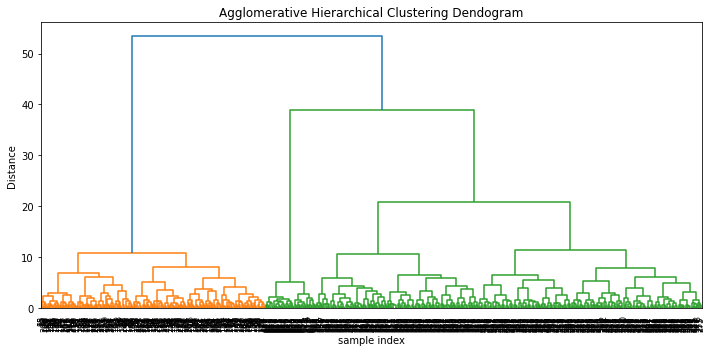

In [1596]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [1588]:
Z = linkage(cccd_agg, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(cccd_agg))

c

0.8356322694421626

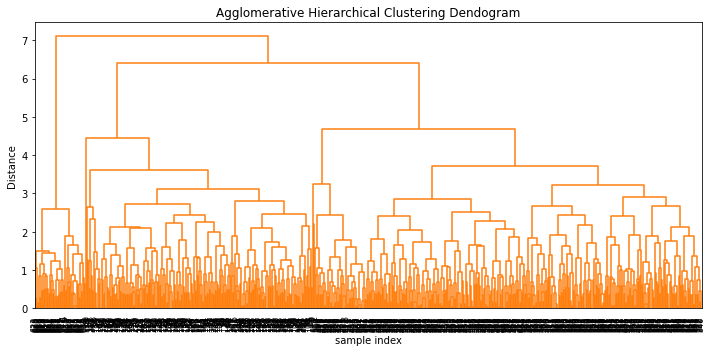

In [1589]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [1599]:
Z = linkage(cccd_agg, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(cccd_agg))
c

0.780002231073503

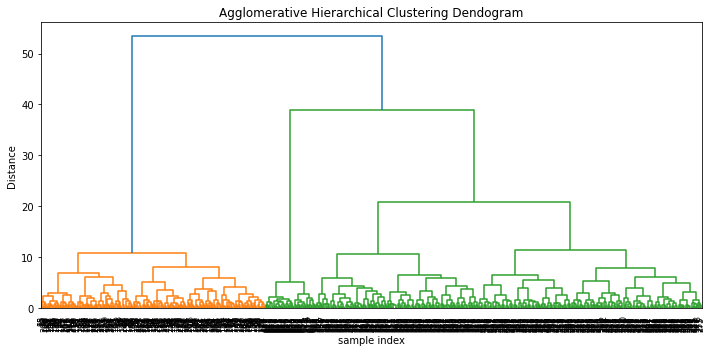

In [1591]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [1600]:
#from above we can say average linkage is the best possible solution. 

In [1601]:
#from average linkage distance 6 can be categorized as the good cluster limit but to match kmeans I am choosing 6

In [1602]:
model_agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='average')

In [1603]:
model_agg.fit(cccd_agg)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [1604]:
cccd_agg['labels'] = model_agg.labels_
cccd_agg.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.630478,-1.249225,-0.860451,-1.001984,-1.251537,2
1,0.885387,-0.787585,-1.473731,2.158203,1.891859,4
2,0.885387,1.058973,-0.860451,0.505809,0.145528,1
3,0.336281,0.135694,-0.860451,-1.001984,0.145528,3
4,1.630478,0.597334,-1.473731,2.408431,-0.203739,1
5,-0.099569,-0.787585,-1.473731,-1.001984,1.542593,0
6,1.630478,0.135694,-1.473731,2.289012,-0.553005,1
7,-0.408809,-0.787585,-1.473731,-1.001984,-0.902271,2
8,-1.589750,-1.249225,-1.473731,-0.050673,-0.553005,0
9,-2.138856,-0.325946,-1.473731,-1.001984,1.193326,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa2fb052b0>,
      dtype=object)

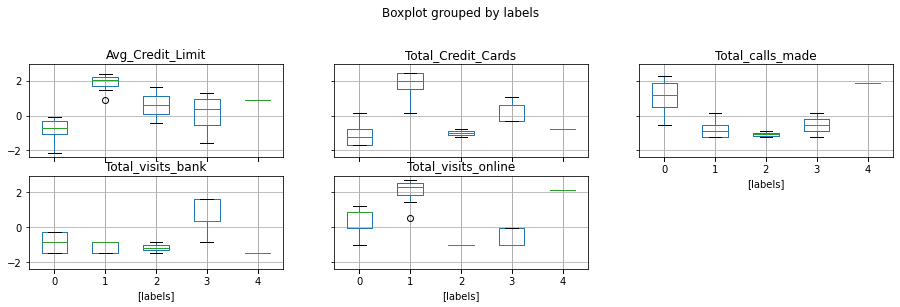

In [1605]:
cccd_agg.boxplot(by='labels',  layout=(5,3), figsize=(15, 10))

In [1606]:
#Group 0 has high Avg credit limit max total creidt card less total calls made but max total visits to the bank

#Group 1 has almost the same credit card average limit as group 0 but lower number of credit cards as compared to 
#Group 0 and lower number of calls made and max total vists to the bank 

#Group 2 has lower avg credit limit compared to group 0 and group 1 but more calls made compared to group 0and 1 






In [1607]:
from sklearn.metrics import silhouette_score

In [1608]:
cccd_agg.drop(["labels"],inplace=True,axis=1)

In [1609]:
print(silhouette_score(cccd_agg, model_agg.fit_predict(cccd_agg)))

0.36238828707888104


In [1610]:
cccd_kmeans.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.630478,-1.249225,-0.860451,-1.001984,-1.251537
1,0.885387,-0.787585,-1.473731,2.158203,1.891859
2,0.885387,1.058973,-0.860451,0.505809,0.145528
3,0.336281,0.135694,-0.860451,-1.001984,0.145528
4,1.630478,0.597334,-1.473731,2.408431,-0.203739


In [1611]:
print(silhouette_score(cccd_kmeans, kmeans.predict(cccd_kmeans)))

0.3507007736711299


In [1612]:
#we can see from the silhoutte_score with 5 clusters in AgglomerativeClustering is better than 5 clusters in kmeans

In [1613]:
kmeans_labels = kmeans.labels_
kmeans_labels

array([1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [1614]:
model_agg_labels = model_agg.labels_
model_agg_labels

array([2, 4, 1, 3, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [1488]:
#Find the centroid of the agglomerative cluster

In [1615]:
cccd_agg['labels'] = model_agg_labels

In [1616]:
cccd_agg.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.630478,-1.249225,-0.860451,-1.001984,-1.251537,2
1,0.885387,-0.787585,-1.473731,2.158203,1.891859,4
2,0.885387,1.058973,-0.860451,0.505809,0.145528,1
3,0.336281,0.135694,-0.860451,-1.001984,0.145528,3
4,1.630478,0.597334,-1.473731,2.408431,-0.203739,1


In [1617]:
c0 = cccd_agg[cccd_agg['labels']==0][['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']].mean().values
c0

array([-0.73968359, -1.05670241, -0.89345225,  0.64697331,  1.14947227])

In [1618]:
c1 = cccd_agg[cccd_agg['labels']==1][['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']].mean().values
c1

array([ 1.94529187,  1.84647615, -1.10095265,  2.19323026, -0.85433262])

In [1619]:
c2 = cccd_agg[cccd_agg['labels']==2][['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']].mean().values
c2

array([ 0.61083406, -1.01840496, -1.1670907 , -1.00198355, -1.07690425])

In [1620]:
c3 = cccd_agg[cccd_agg['labels']==3][['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']].mean().values
c3

array([ 0.1661423 ,  0.37675914,  0.67675287, -0.66914889, -0.55482873])

In [1621]:
c4 = cccd_agg[cccd_agg['labels']==4][['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']].mean().values
c4

array([ 0.88538707, -0.78758515, -1.47373077,  2.15820318,  1.89185881])

In [1622]:
cccd_agg.shape

(660, 6)

In [1623]:
#The 5 clusters are divided in such a way 

In [1624]:
import pylab as pl

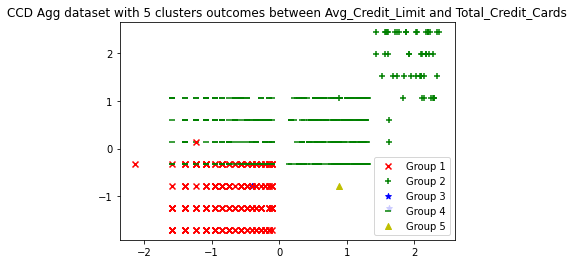

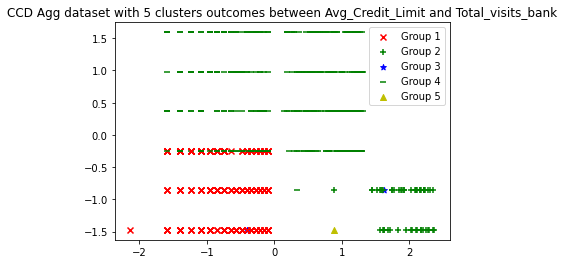

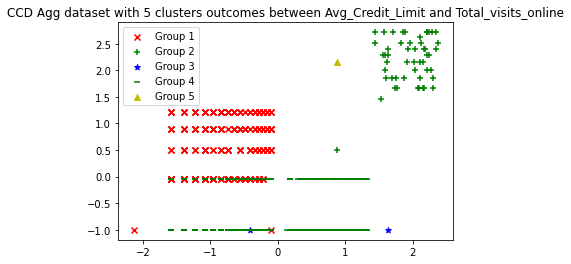

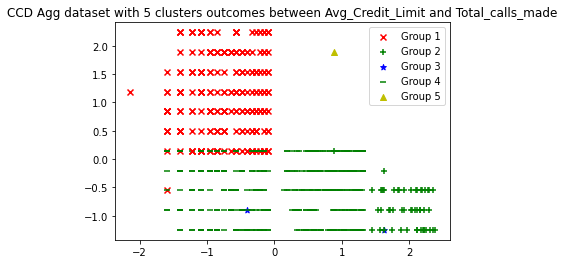

In [1625]:
features = ['Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']
for j in features:   
    for i in range(0, cccd_agg.shape[0]):
        if cccd_agg['labels'][i] == 0:
            c0scatter = pl.scatter(cccd_agg['Avg_Credit_Limit'][i],cccd_agg[j][i],c='r',marker='x')
        elif cccd_agg['labels'][i] == 1:
            c1scatter = pl.scatter(cccd_agg['Avg_Credit_Limit'][i],cccd_agg[j][i],c='g',marker='+')
        elif cccd_agg['labels'][i] == 2:
            c2scatter = pl.scatter(cccd_agg['Avg_Credit_Limit'][i],cccd_agg[j][i],c='b',marker='*')
        elif cccd_agg['labels'][i] == 3:
            c3scatter = pl.scatter(cccd_agg['Avg_Credit_Limit'][i],cccd_agg[j][i],c='g',marker='_')
        elif cccd_agg['labels'][i] == 4:
            c4scatter = pl.scatter(cccd_agg['Avg_Credit_Limit'][i],cccd_agg[j][i],c='y',marker='^')
    pl.legend([c0scatter,c1scatter,c2scatter,c3scatter,c4scatter], ['Group 1','Group 2','Group 3','Group 4','Group 5'])
    pl.title('CCD Agg dataset with 5 clusters outcomes between Avg_Credit_Limit and {0}'.format(j))
    pl.show()        

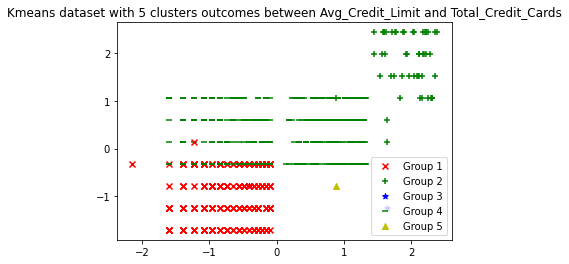

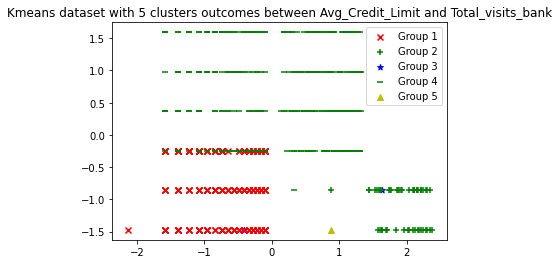

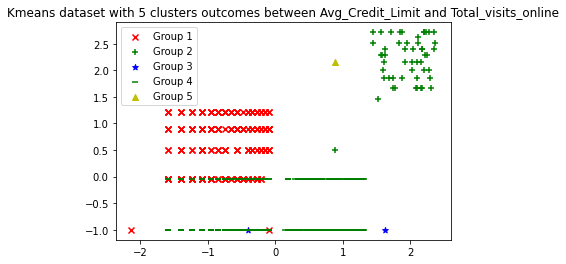

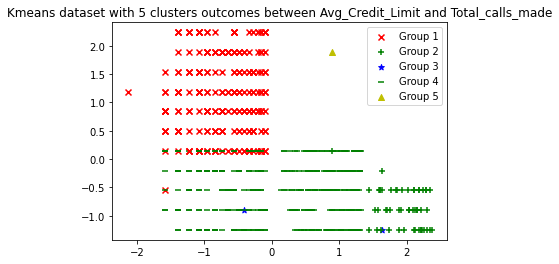

In [1626]:
features = ['Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']
for j in features:   
    for i in range(0, cccd_kmeans.shape[0]):
        if cccd_kmeans['labels'][i] == 0:
            c0scatter = pl.scatter(cccd_kmeans['Avg_Credit_Limit'][i],cccd_kmeans[j][i],c='r',marker='x')
        elif cccd_kmeans['labels'][i] == 1:
            c1scatter = pl.scatter(cccd_kmeans['Avg_Credit_Limit'][i],cccd_kmeans[j][i],c='g',marker='+')
        elif cccd_kmeans['labels'][i] == 2:
            c2scatter = pl.scatter(cccd_kmeans['Avg_Credit_Limit'][i],cccd_kmeans[j][i],c='b',marker='*')
        elif cccd_kmeans['labels'][i] == 3:
            c3scatter = pl.scatter(cccd_kmeans['Avg_Credit_Limit'][i],cccd_kmeans[j][i],c='g',marker='_')
        elif cccd_kmeans['labels'][i] == 4:
            c4scatter = pl.scatter(cccd_kmeans['Avg_Credit_Limit'][i],cccd_kmeans[j][i],c='y',marker='^')
    pl.legend([c0scatter,c1scatter,c2scatter,c3scatter,c4scatter], ['Group 1','Group 2','Group 3','Group 4','Group 5'])
    pl.title('Kmeans dataset with 5 clusters outcomes between Avg_Credit_Limit and {0}'.format(j))
    pl.show()  

In [1527]:
#It seems both the clusters are almost identical 

In [1528]:
cccd_agg.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
Avg_Credit_Limit,1.000000,0.586243,0.073937,0.104745,-0.466308,-0.526895
Total_Credit_Cards,0.586243,1.000000,0.315796,-0.061622,-0.651251,-0.729182
Total_visits_bank,0.073937,0.315796,1.000000,-0.632113,-0.506016,-0.422165
Total_visits_online,0.104745,-0.061622,-0.632113,1.000000,0.335119,0.221815
Total_calls_made,-0.466308,-0.651251,-0.506016,0.335119,1.000000,0.857518
labels,-0.526895,-0.729182,-0.422165,0.221815,0.857518,1.000000


In [1529]:
cccd_kmeans.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
Avg_Credit_Limit,1.000000,0.586243,0.073937,0.104745,-0.466308,-0.526895
Total_Credit_Cards,0.586243,1.000000,0.315796,-0.061622,-0.651251,-0.729182
Total_visits_bank,0.073937,0.315796,1.000000,-0.632113,-0.506016,-0.422165
Total_visits_online,0.104745,-0.061622,-0.632113,1.000000,0.335119,0.221815
Total_calls_made,-0.466308,-0.651251,-0.506016,0.335119,1.000000,0.857518
labels,-0.526895,-0.729182,-0.422165,0.221815,0.857518,1.000000


Conclusion:
    1.Three sets of customers. 
    2. 
      Customer with higher credit score and higher number of credit card. 
      Customer who like to visit the bank or call the bank to get the job done. 
      Customer while like to handle all the transaction online. 
    3.
    From above we can confirm that people with hight avg_credit_limit tend to have more credit cards and also they like to visit or call bank less they like to handle there account online 
    For the customer with less available credit they do like to come to bank or call people. 
    If customer is visiting the bank more likely he would be not using the online services.
    A new investement scheme which is suitable for the above average credit score and multiple credit card accounts should be marketed online.
    A new investement scheme should not be marketable on the incoming calls. 
    
    